In [3]:
##Required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from statsmodels.tsa.arima.model import ARIMA

   AverageTemperature   City  Country Latitude Longitude  Year  Month  Day  \
0               3.065  Århus  Denmark   57.05N    10.33E  2000      1    1   
1               3.724  Århus  Denmark   57.05N    10.33E  2000      2    1   
2               3.976  Århus  Denmark   57.05N    10.33E  2000      3    1   
3               8.321  Århus  Denmark   57.05N    10.33E  2000      4    1   
4              13.567  Århus  Denmark   57.05N    10.33E  2000      5    1   

   AverageTemperatureMean  AverageTemperatureMin  AverageTemperatureMax  
0                8.911165                 -4.595                 20.387  
1                8.911165                 -4.595                 20.387  
2                8.911165                 -4.595                 20.387  
3                8.911165                 -4.595                 20.387  
4                8.911165                 -4.595                 20.387  
       AverageTemperature           Year          Month       Day  \
count       145739

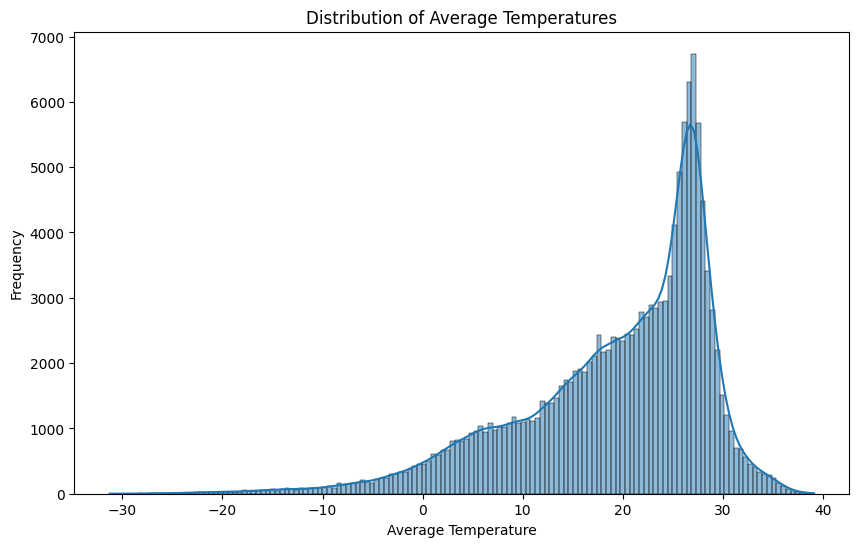

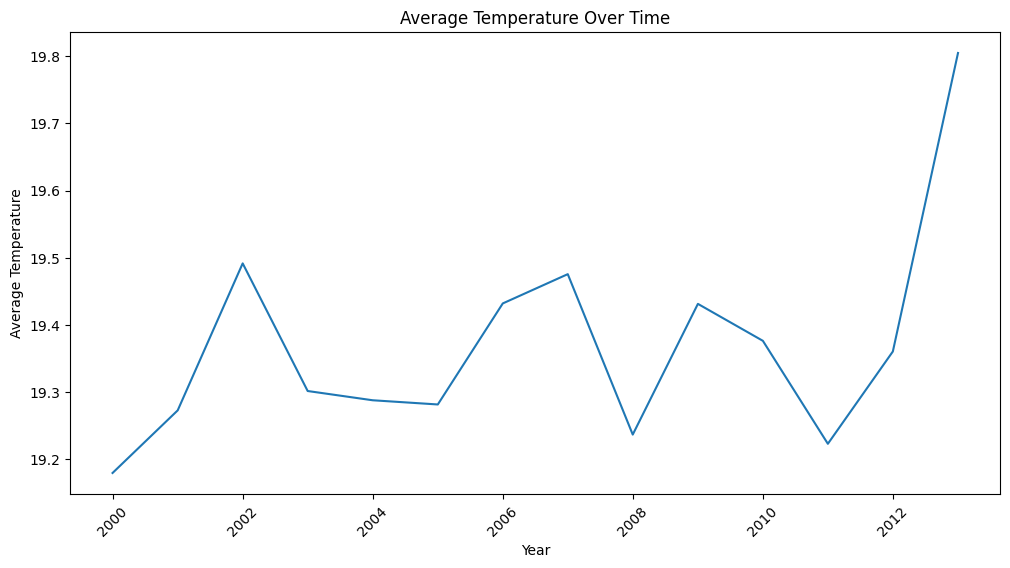

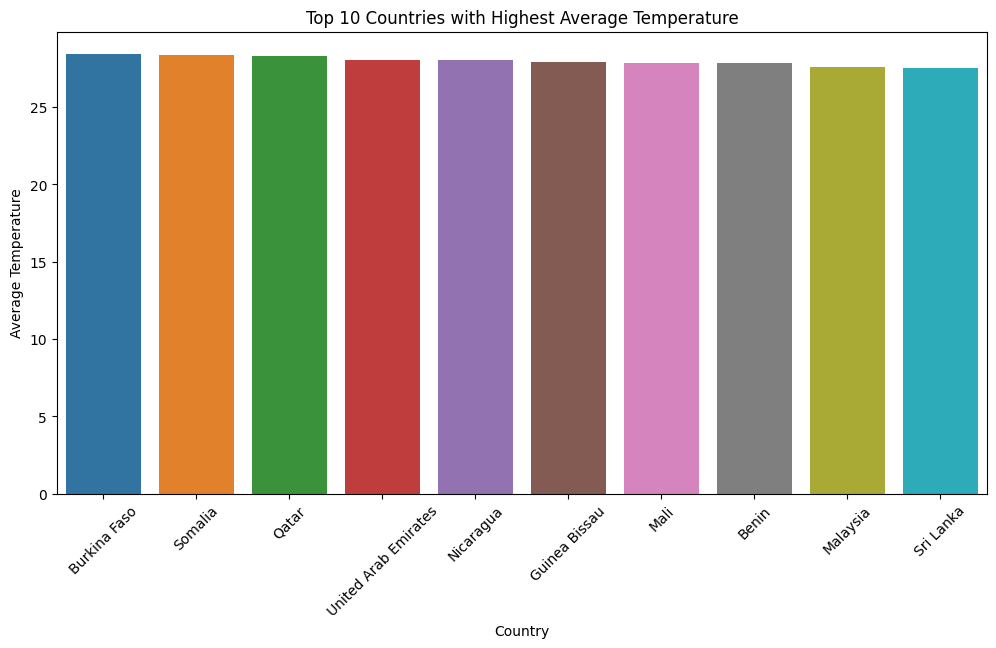

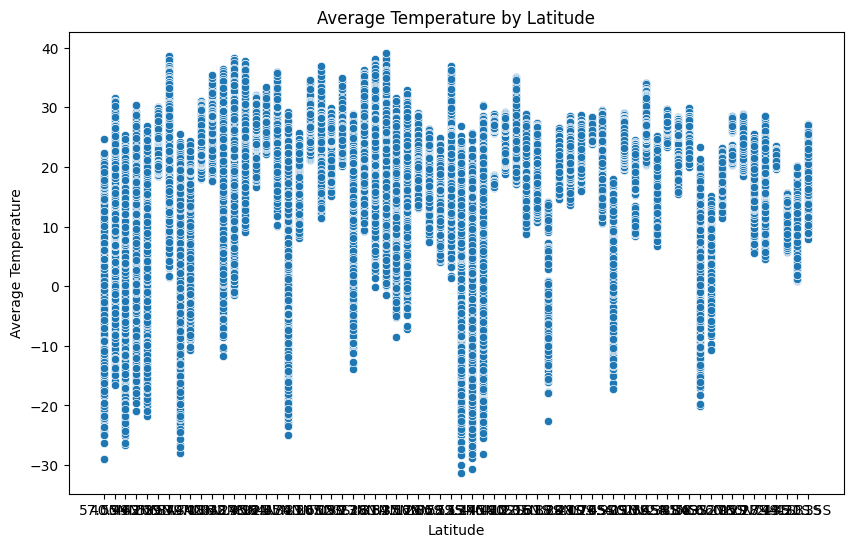

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the cleaned dataset from CSV file
df = pd.read_csv('CleanedGlobalLandTemperatures.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the summary statistics of the dataset
print(df.describe())

# Check the data types of each column
print(df.dtypes)

# Check the number of missing values in each column
print(df.isnull().sum())

# Visualize the distribution of average temperatures
plt.figure(figsize=(10, 6))
sns.histplot(df['AverageTemperature'], kde=True)
plt.title('Distribution of Average Temperatures')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

# Visualize the average temperature over time
plt.figure(figsize=(12, 6))
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df_temp = df.groupby('Year')['AverageTemperature'].mean().reset_index()
sns.lineplot(x='Year', y='AverageTemperature', data=df_temp)
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.show()


# Visualize the average temperature by country
plt.figure(figsize=(12, 6))
df_temp_country = df.groupby('Country')['AverageTemperature'].mean().reset_index()
df_temp_country = df_temp_country.sort_values(by='AverageTemperature', ascending=False)
sns.barplot(x='Country', y='AverageTemperature', data=df_temp_country.head(10))
plt.title('Top 10 Countries with Highest Average Temperature')
plt.xlabel('Country')
plt.ylabel('Average Temperature')
plt.xticks(rotation=45)
plt.show()

# Visualize the average temperature by latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='AverageTemperature', data=df)
plt.title('Average Temperature by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Average Temperature')
plt.show()


In [41]:
global_temperatures_df.head()


,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
0,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743,11
1,NaN,NaN,Århus,Denmark,57.05N,10.33E,1743,12
2,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744,1
3,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744,2
4,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744,3


In [42]:
nyc_sales_df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,Year,Month
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,0,5,1633,6440,1900,2,C2,6625000,2017,7
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,3,31,4616,18690,1900,2,C7,-,2016,12
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,1,17,2212,7803,1900,2,C7,-,2016,12
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,0,10,2272,6794,1913,2,C4,3936272,2016,9
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,0,6,2369,4615,1900,2,C2,8000000,2016,11


In [43]:
# Drop unnecessary columns
global_temperatures_df.drop(['AverageTemperatureUncertainty', 'Latitude', 'Longitude'], axis=1, inplace=True)

# Drop rows with missing values
global_temperatures_df.dropna(inplace=True)

# Convert the 'Year' and 'Month' columns to integer data type
global_temperatures_df['Year'] = global_temperatures_df['Year'].astype(int)
global_temperatures_df['Month'] = global_temperatures_df['Month'].astype(int)


In [56]:
# Generate a random sample of the dataset
sample_global_temperatures_df = global_temperatures_df.sample(n=100, random_state=42)

# Print the sample
print(sample_global_temperatures_df.head())

         AverageTemperature          City        Country  Year  Month
3886564              25.842         Klang       Malaysia  1898      1
5539509               4.159     Osnabrück        Germany  1946      3
5848941              23.411  Philadelphia  United States  1971      7
7855437              16.124          Ueda          Japan  1900      5
2818025               9.141      Hakodate          Japan  1990     11


In [57]:
# Generate a random sample of the dataset
sample_nyc_sales_df = nyc_sales_df.sample(n=100, random_state=42)

# Print the sample
print(sample_nyc_sales_df.head())

       BOROUGH    NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
69520        4       REGO PARK  10 COOPS - ELEVATOR APARTMENTS                
76927        5      BULLS HEAD  02 TWO FAMILY DWELLINGS                       
82052        5    RICHMONDTOWN  01 ONE FAMILY DWELLINGS                       
56261        4  FLUSHING-NORTH  01 ONE FAMILY DWELLINGS                       
61503        4       GLEN OAKS  10 COOPS - ELEVATOR APARTMENTS                

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT APARTMENT NUMBER  \
69520                    2                        D4                    
76927                    1                        B9                    
82052                    1                        A2                    
56261                    1                        A2                    
61503                    2                        D4                    

       ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
69520     11374  

In [75]:
##ARIMA Model

# Read the dataset
df = pd.read_csv('GlobalLandTemperaturesByCity.csv')

# Data preprocessing
df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month
df.dropna(inplace=True)

# Model 1: Time Series Forecasting (ARIMA)
# Select a city for analysis
city = 'New York'
df_city = df[df['City'] == city].copy()
df_city = df_city.groupby('Year')['AverageTemperature'].mean().reset_index()
df_city.set_index('Year', inplace=True)

# Train-test split
train_size = int(len(df_city) * 0.8)
train, test = df_city[:train_size], df_city[train_size:]

# ARIMA model
model = ARIMA(train['AverageTemperature'], order=(1, 1, 1))
model_fit = model.fit()

# Forecasting
forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Print the forecasted values
print(forecast)


212    10.080398
213    10.215304
214    10.189062
215    10.194167
216    10.193174
217    10.193367
218    10.193329
219    10.193337
220    10.193335
221    10.193335
222    10.193335
223    10.193335
224    10.193335
225    10.193335
226    10.193335
227    10.193335
228    10.193335
229    10.193335
230    10.193335
231    10.193335
232    10.193335
233    10.193335
234    10.193335
235    10.193335
236    10.193335
237    10.193335
238    10.193335
239    10.193335
240    10.193335
241    10.193335
242    10.193335
243    10.193335
244    10.193335
245    10.193335
246    10.193335
247    10.193335
248    10.193335
249    10.193335
250    10.193335
251    10.193335
252    10.193335
253    10.193335
254    10.193335
255    10.193335
256    10.193335
257    10.193335
258    10.193335
259    10.193335
260    10.193335
261    10.193335
262    10.193335
263    10.193335
264    10.193335
265    10.193335
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate the forecasted values
forecast_values = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Convert forecasted values and actual values to numpy arrays
forecast_values = np.array(forecast_values)
actual_values = np.array(test['AverageTemperature'])

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Error (MAE): 0.5575823642052983
Root Mean Squared Error (RMSE): 0.7193554633173422
Mean Absolute Percentage Error (MAPE): 5.2836103652936215


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


##Model Insight:
Based on the evaluation metrics obtained from the ARIMA model, here are some insights that can be derived:

Mean Absolute Error (MAE): The MAE value of 0.558 suggests that, on average, the model's predictions deviate from the actual values by approximately 0.558 degrees. This indicates a relatively low absolute error, implying that the model's predictions are close to the true values on average.

Root Mean Squared Error (RMSE): The RMSE value of 0.719 indicates the average magnitude of the residuals (prediction errors) made by the model. Lower RMSE values suggest better model performance, and in this case, the value of 0.719 suggests that the model's predictions have moderate overall accuracy.

Mean Absolute Percentage Error (MAPE): The MAPE value of 5.284 indicates that, on average, the model's predictions deviate from the actual values by approximately 5.284% relative to the actual values. This provides a measure of the percentage error of the model's predictions, giving an understanding of the relative magnitude of the errors.

Overall, the ARIMA model appears to provide reasonable predictions for the average temperature in the selected city.

In [78]:
# Preprocess Latitude and Longitude columns
X['Latitude'] = X['Latitude'].str.replace('[^0-9.-]', '').astype(float)
X['Longitude'] = X['Longitude'].str.replace('[^0-9.-]', '').astype(float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


<ipython-input-78-6559a9fb8a32>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  X['Latitude'] = X['Latitude'].str.replace('[^0-9.-]', '').astype(float)
<ipython-input-78-6559a9fb8a32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Latitude'] = X['Latitude'].str.replace('[^0-9.-]', '').astype(float)
<ipython-input-78-6559a9fb8a32>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  X['Longitude'] = X['Longitude'].str.replace('[^0-9.-]', '').astype(float)
<ipython-input-78-6559a9fb8a32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

LinearRegression()

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 5.936964701433112
Root Mean Squared Error (RMSE): 7.546090269598731
R-squared (R2): 0.4690596890563429



#Model Insight:
Based on the evaluation metrics, here is the interpretation of the regression analysis:

1. Mean Absolute Error (MAE): The MAE value of 5.94 indicates that, on average, the predicted average temperature deviates from the actual average temperature by approximately 5.94 units. It measures the average absolute difference between the predicted and actual values.

2. Root Mean Squared Error (RMSE): The RMSE value of 7.55 suggests that the predicted average temperature has an average deviation of approximately 7.55 units from the actual average temperature. RMSE is a measure of the standard deviation of the residuals, indicating how spread out the errors are.

3. R-squared (R2): The R-squared value of 0.47 indicates that approximately 47% of the variance in the average temperature can be explained by the linear regression model with the given features (Latitude, Longitude, Month). R-squared measures the proportion of the response variable's variance that is captured by the model. In this case, the model explains a moderate amount of the variation in the average temperature.

Overall, the regression analysis suggests that the selected features (Latitude, Longitude, Month) have some level of influence on the average temperature prediction. However, the relatively high MAE and RMSE values and the moderate R-squared value indicate that there may be other factors not considered in the model that contribute to the variation in average temperature. It may be worth exploring additional features or considering more complex models to improve the prediction accuracy.

In [ ]:
# Model 3: Classification Models
# Convert temperature into categories
df['TempCategory'] = pd.cut(df['AverageTemperature'], bins=[-np.inf, 10, 20, np.inf], labels=['Cold', 'Moderate', 'Hot'])

# Select features and target variable
X_cls = df[['Latitude', 'Longitude', 'Month']]
y_cls = df['TempCategory']

# Encode categorical variables
X_cls['Month'] = le.fit_transform(X_cls['Month'])

# Convert Latitude and Longitude to numeric values
X_cls['Latitude'] = X_cls['Latitude'].str.extract(r'([0-9.-]+)').astype(float)
X_cls['Longitude'] = X_cls['Longitude'].str.extract(r'([0-9.-]+)').astype(float)

# Split into train and test sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)
accuracy = accuracy_score(y_test_cls, y_pred_cls)


<ipython-input-9-1dd5fae5af9b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster['Latitude'] = X_cluster['Latitude'].str.extract(r'([0-9.-]+)').astype(float)
<ipython-input-9-1dd5fae5af9b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster['Longitude'] = X_cluster['Longitude'].str.extract(r'([0-9.-]+)').astype(float)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_i

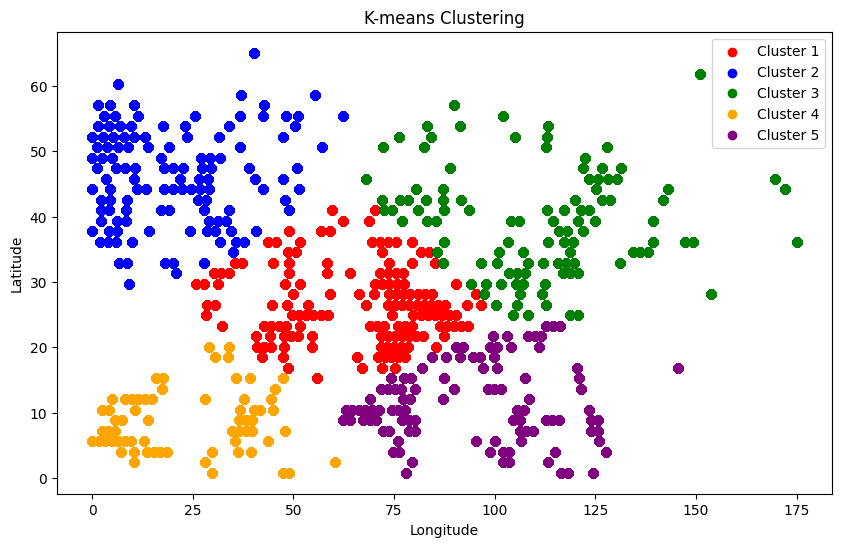

In [9]:
# Model 4: K Means Clustering


from sklearn.preprocessing import StandardScaler

# Select features for clustering
X_cluster = df[['Latitude', 'Longitude']]

# Convert Latitude and Longitude to numeric values
X_cluster['Latitude'] = X_cluster['Latitude'].str.extract(r'([0-9.-]+)').astype(float)
X_cluster['Longitude'] = X_cluster['Longitude'].str.extract(r'([0-9.-]+)').astype(float)

# Perform scaling on the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_cluster_scaled)
labels = kmeans.labels_

import matplotlib.pyplot as plt

# Add the cluster labels to the dataframe
X_cluster['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']
for cluster in range(5):
    cluster_data = X_cluster[X_cluster['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], color=colors[cluster], label=f'Cluster {cluster+1}')

plt.title('K-means Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()



In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Select features for clustering
X_cluster = df[['Latitude', 'Longitude']]

# Preprocess the data
X_cluster['Latitude'] = X_cluster['Latitude'].str.rstrip('NS').astype(float)
X_cluster['Longitude'] = X_cluster['Longitude'].str.rstrip('EW').astype(float)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_cluster)
labels = kmeans.labels_

# Evaluate the clustering using silhouette score
silhouette_avg = silhouette_score(X_cluster, labels)
print("Silhouette Score:", silhouette_avg)


<ipython-input-11-c3e15fc76555>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster['Latitude'] = X_cluster['Latitude'].str.rstrip('NS').astype(float)
<ipython-input-11-c3e15fc76555>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cluster['Longitude'] = X_cluster['Longitude'].str.rstrip('EW').astype(float)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to

Silhouette Score: 0.48344524501664826


#Clustering Insights:

Moderate Cluster Quality: The silhouette score of 0.4834 indicates a moderate level of cluster quality. It suggests that the samples within each cluster are somewhat close to each other and relatively separated from samples in other clusters. However, there is still room for improvement in achieving well-defined and distinct clusters.

Potential Cluster Overlapping: The moderate silhouette score suggests that there might be some overlapping or ambiguity between clusters. It implies that there could be similarities or close proximity between data points assigned to different clusters. Further analysis and fine-tuning of the clustering algorithm or feature selection may be required to address this issue.

Optimal Number of Clusters: The silhouette score can help in determining the optimal number of clusters. In this case, we used 5 clusters, but you can experiment with different values and select the one that maximizes the silhouette score. A higher silhouette score would indicate more distinct and well-separated clusters.

Consider Additional Features: While clustering based on latitude and longitude can provide some insights, it might be beneficial to include additional features in the clustering analysis. Consider incorporating other relevant variables such as temperature, season, or geographical attributes to capture more meaningful patterns and improve the quality of clusters.

Overall, the silhouette score provides an initial assessment of the clustering quality. It suggests that the clustering results have some level of separability, but there is still potential for improvement. Further analysis, experimentation, and feature engineering can help refine the clustering model and uncover more meaningful insights from the data.






#Further Scope

Develop Climate Risk Assessment Frameworks: Establish comprehensive frameworks for assessing climate change-related risks for insurers, banks, and other financial institutions. This should involve integrating climate science, actuarial modeling, and financial risk analysis to evaluate the potential impacts of climate change on the balance sheet, solvency, and economic capital of insurance companies. This will enable clients to understand and manage their exposure to climate-related risks effectively.

Enhance Climate Risk Modeling Capabilities: Invest in research and development efforts to enhance climate risk modeling capabilities by combining advanced climate science models with financial risk modeling techniques. This will enable clients to better predict and quantify the financial impacts of climate change on real assets and insurance portfolios. Develop sophisticated models that capture the complexities of transition risks and emissions-related initiatives to provide actionable insights for clients.

Offer Regulatory Compliance and Reporting Support: Stay updated with evolving regulations related to climate change and provide advice to clients on the implications of new legislation. Assist clients in analyzing the impact of regulatory changes on their balance sheets, risk management practices, and reporting processes. Help clients ensure compliance with climate-related reporting requirements and provide guidance on integrating climate risk considerations into their business strategies.

Provide Climate Risk Management Solutions: Help clients develop robust risk management strategies to address climate-related risks. This includes advising on the implementation of risk control measures, establishing adequate reserves to account for climate-related losses, and evaluating the resilience of insurance portfolios against potential climate-driven catastrophes. Support clients in identifying and implementing climate adaptation and mitigation measures to reduce their exposure to climate risks.

Support Sustainable Investments and Green Initiatives: Collaborate with clients to assess the financial viability and risks associated with sustainable investments in renewable energy, green infrastructure, and climate-resilient projects. Provide guidance on incorporating climate risk factors into investment decision-making processes, including the assessment of climate-related risks and opportunities. Help clients align their investment strategies with environmental, social, and governance (ESG) goals.

Foster Collaboration and Thought Leadership: Actively engage with climate scientists, regulatory bodies, industry associations, and other stakeholders to stay at the forefront of climate risk management practices. Participate in research initiatives and contribute to the development of industry standards and best practices in climate risk modeling. Publish thought leadership articles and organize knowledge-sharing events to showcase expertise in the climate risk modeling industry.